In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
#path = "../sparse/"
#prefix = "sparse_tmp_"

path = "../../bert-cmp/bert/"
prefix=""

In [4]:
results_df = pd.read_csv(path+'pretraining_output-100k-2/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,24,24,22,2,236,24,229,37,24,241,...,0,0,0,0,0,0,0,0,0,0
1,24,426,25,2,752,24,603,564,24,199,...,1142,52,1142,769,24,24,24,654,24,3
2,24,97,3,2,460,6,4,318,52,24,...,24,236,29,1142,135,24,256,24,37,3
3,24,47,7,2,56,57,58,106,236,24,...,0,0,0,0,0,0,0,0,0,0
4,24,57,18,2,52,24,37,52,24,52,...,0,0,0,0,0,0,0,0,0,0
5,24,24,22,2,5,43,24,152,318,10,...,0,0,0,0,0,0,0,0,0,0
6,24,24,32,2,37,24,80,37,318,75,...,0,0,0,0,0,0,0,0,0,0
7,24,113,3,2,112,24,4,24,619,24,...,0,0,0,0,0,0,0,0,0,0
8,24,406,6,2,56,57,58,41,58,4,...,0,0,0,0,0,0,0,0,0,0
9,24,44,4,2,5,43,24,4,24,10,...,0,0,0,0,0,0,0,0,0,0


In [19]:
vocab_file = "global_vocab.csv"
vocab_file = "sparse_tmp_vocab-code.txt"
#vocab_file = "vocab-code.txt"

vocab_df = pd.read_csv(path+vocab_file, header=None)
vocab_df.shape

(1156, 1)

In [20]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.shape

(1851, 1)

In [21]:
set(vocab_df[0]) - set(vocab_df2[0])

set()

In [22]:
vocab_df

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,[cls]
6,if
7,unaryop
8,not
9,call


In [23]:
len(vocab_df)

1156

In [24]:
accuracy = 0

In [25]:
per_token_acc = {}; per_token_count = {}

In [26]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

KeyboardInterrupt: 

In [ ]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [ ]:
import matplotlib.pyplot as plt

In [15]:
from collections import Counter
import numpy as np

In [16]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('keyword', 1.0),
 ('float16', 0.0),
 ('gradients', 0.0),
 ('decode', 0.0),
 ('yaml', 0.0),
 ('list', 0.0),
 ('batches', 0.0),
 ('filewriter', 0.0),
 ('upsampling1d', 0.0),
 ('indexedslices', 0.0),
 ('check', 0.0),
 ('fieldnames', 0.0),
 ('last', 0.0),
 ('tuple', 0.0),
 ('b', 0.0),
 ('devices', 0.0),
 ('chunk', 0.0),
 ('when', 0.0),
 ('msg', 0.0),
 ('extslice', 0.0),
 ('conv1d', 0.0),
 ('states', 0.0),
 ('pass', 0.0),
 ('elements', 0.0),
 ('gt', 0.0),
 ('ordering', 0.0),
 ('add', 0.0),
 ('attribute', 0.0),
 ('expand', 0.0),
 ('eq', 0.0),
 ('[PAD]', 0.0),
 ('nw', 0.0),
 ('tensorsharedvariable', 0.0),
 ('seen', 0.0),
 ('history', 0.0),
 ('phases', 0.0),
 ('dictcomp', 0.0),
 ('next', 0.0),
 ('step', 0.0),
 ('t', 0.0),
 ('nodes', 0.0),
 ('mult', 0.0),
 ('old', 0.0),
 ('dict', 0.0),
 ('import', 0.0),
 ('devs', 0.0),
 ('preprocess', 0.0),
 ('graph', 0.0),
 ('self', 0.0),
 ('at', 0.0),
 ('rnn', 0.0),
 ('stack', 0.0),
 ('select', 0.0),
 ('preprocessor', 0.0),
 ('model', 0.0),
 ('tmp', 0.0),
 

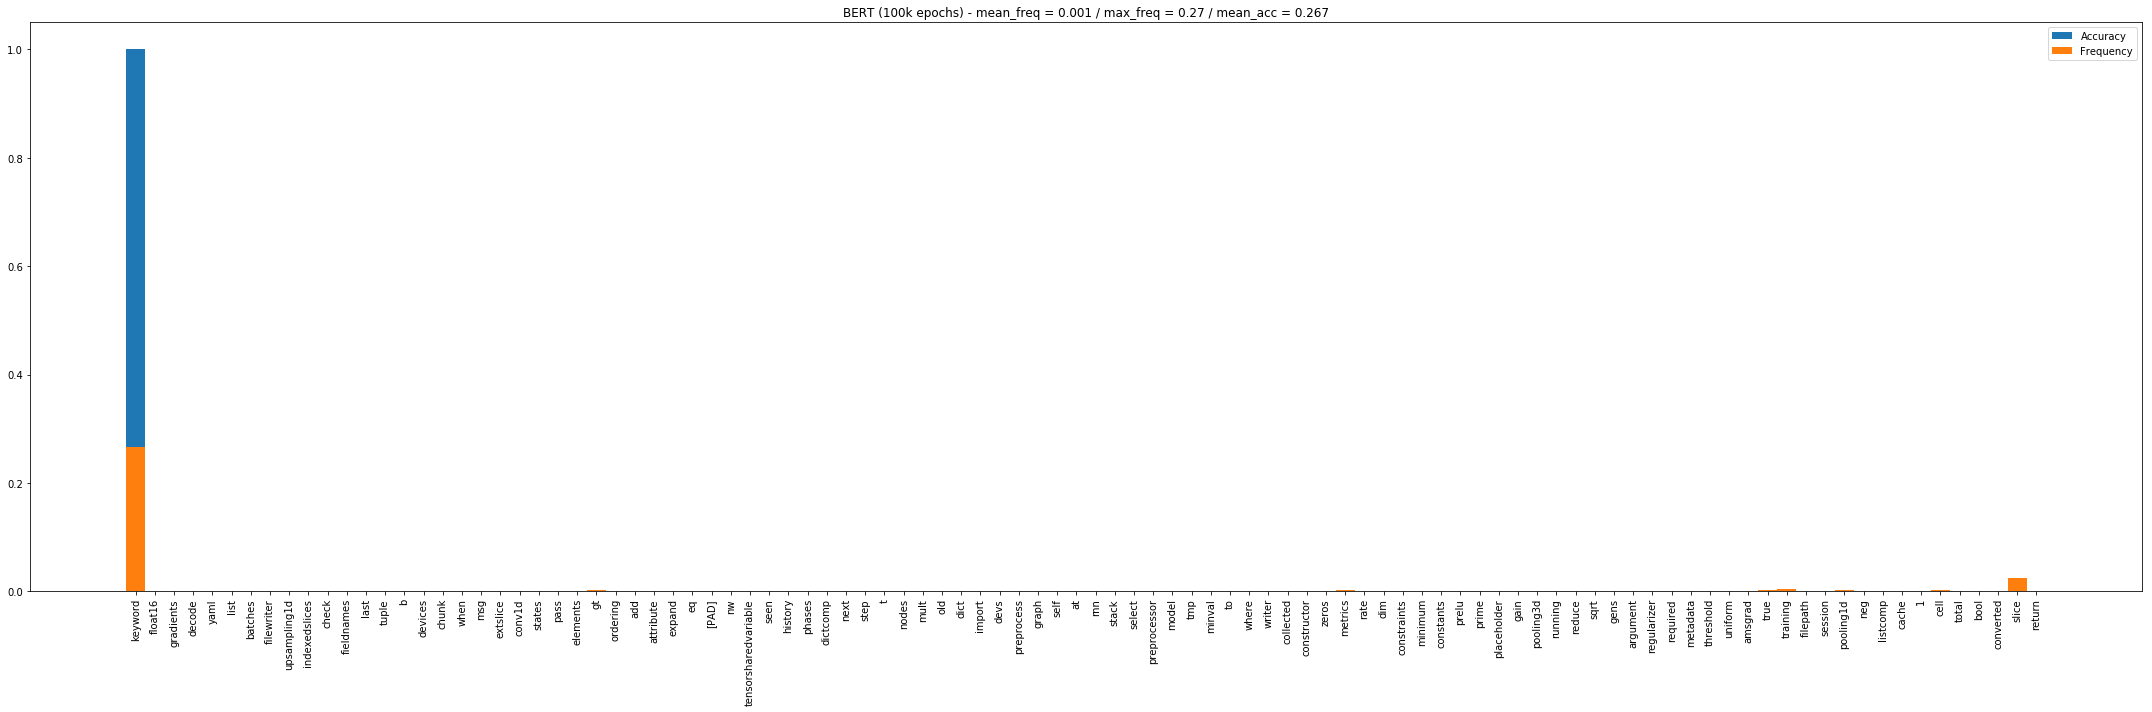

In [17]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(100))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('BERT (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('BERT-100k2_epochs_top100.pdf')
plt.show()

In [72]:
pred = list(results_df.loc[10][3:])
pred

[2,
 2,
 237,
 25,
 230,
 53,
 25,
 25,
 603,
 25,
 25,
 7,
 98,
 319,
 25,
 3,
 2,
 398,
 44,
 1142,
 653,
 25,
 104,
 603,
 1142,
 657,
 4,
 655,
 1142,
 871,
 25,
 1142,
 655,
 659,
 1142,
 871,
 25,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [73]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [74]:
pred_str

['[CLS]',
 '[CLS]',
 'slice',
 'keyword',
 'noteq',
 'equal',
 'keyword',
 'keyword',
 'print',
 'keyword',
 'keyword',
 'arguments',
 'training',
 'instance',
 'keyword',
 '[SEP]',
 '[CLS]',
 'biases',
 'string',
 'batchnorm',
 'subclassed',
 'keyword',
 'target',
 'print',
 'batchnorm',
 'setattr',
 '[MASK]',
 'expects',
 'batchnorm',
 'stopped',
 'keyword',
 'batchnorm',
 'expects',
 'inbound',
 'batchnorm',
 'stopped',
 'keyword',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [75]:
d = Counter(per_token_freq)
d.most_common(100)

[('keyword', 0.26686460438364684),
 ('batchnorm', 0.08261153427638737),
 ('equal', 0.08151406808642934),
 ('instance', 0.04415047411782994),
 ('name', 0.043056116897248566),
 ('filters', 0.03942484066531945),
 ('expects', 0.026326752681486088),
 ('assign', 0.0256831960205192),
 ('slice', 0.02468210788123737),
 ('excepthandler', 0.021517177055806),
 ('string', 0.015712731229597387),
 ('functiondef', 0.015134462925540184),
 ('overwrite', 0.014801803202238457),
 ('floatx', 0.014245297683817814),
 ('print', 0.012267993160267372),
 ('is', 0.011898025804445825),
 ('biases', 0.009127934089849216),
 ('expr', 0.008235659878750193),
 ('arguments', 0.007903000155448469),
 ('extend', 0.0066967200373076324),
 ('saver', 0.006395150007772424),
 ('any', 0.005561946214829784),
 ('argmax', 0.005207523705891497),
 ('on', 0.004651018187470854),
 ('low', 0.004514223534898182),
 ('call', 0.004315249494792476),
 ('progbar', 0.004249961137882792),
 ('queue', 0.004047878128400436),
 ('items', 0.003764961915125

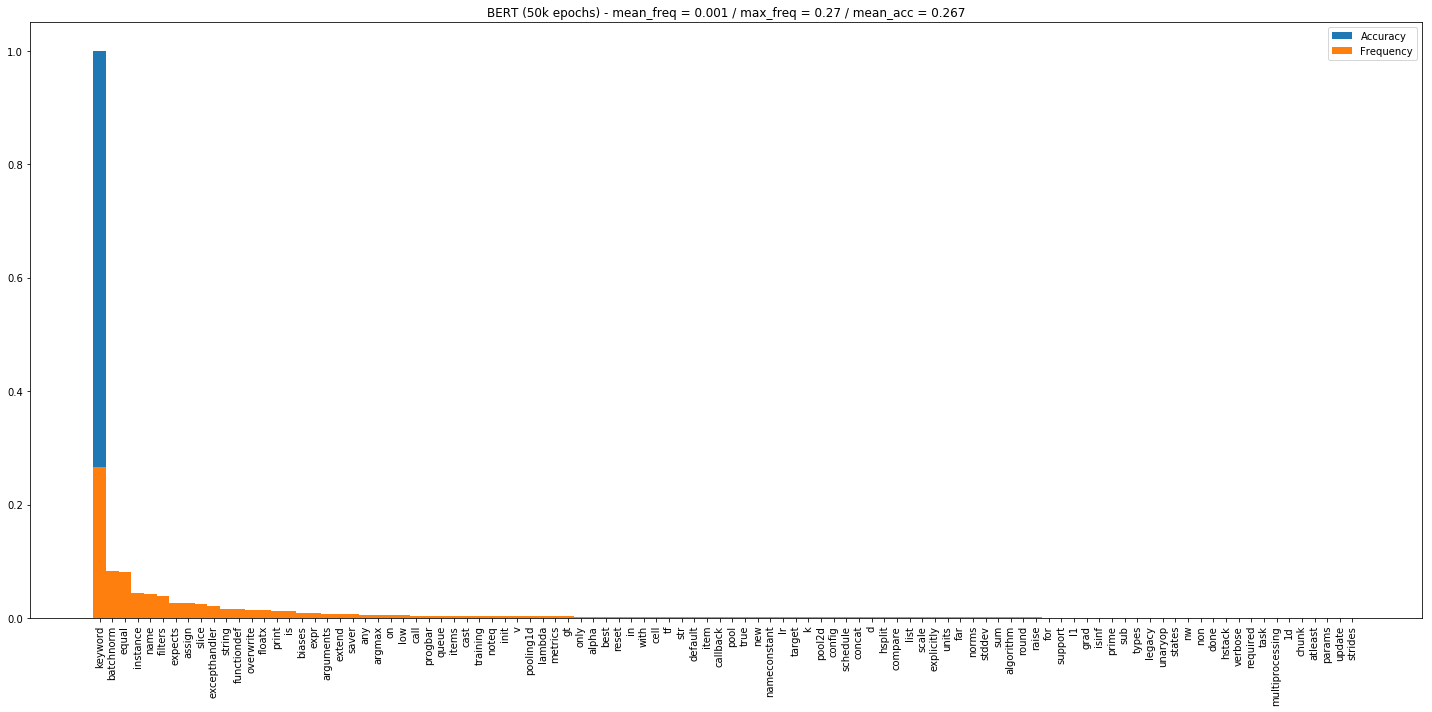

In [76]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('BERT (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('BERT-freq-50k_epochs_top100.png')
plt.show()

In [77]:
confusion = {}

In [78]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if confusion.get(label, None) == None:
        confusion[label] = []
    if prediction != label:
        confusion[label].append(prediction)

In [79]:
confusion_counter = {c: Counter(confusion[c]) for c in confusion}

In [80]:
confusion_counter

{'1': Counter({'keyword': 12}),
 '1d': Counter({'keyword': 221}),
 '2': Counter({'keyword': 12}),
 '2d': Counter({'keyword': 78}),
 '3d': Counter({'keyword': 24}),
 '[CLS]': Counter({'keyword': 9}),
 '[MASK]': Counter({'keyword': 6}),
 '[PAD]': Counter({'keyword': 1}),
 '[SEP]': Counter({'keyword': 19}),
 '[UNK]': Counter({'keyword': 3}),
 '[cls]': Counter({'keyword': 5}),
 'a': Counter({'keyword': 13}),
 'abs': Counter({'keyword': 112}),
 'acc': Counter({'keyword': 4}),
 'accumulators': Counter({'keyword': 7}),
 'activation': Counter({'keyword': 2}),
 'add': Counter({'keyword': 12}),
 'algorithm': Counter({'keyword': 337}),
 'alias': Counter({'keyword': 3}),
 'all': Counter({'keyword': 18}),
 'alloc': Counter({'keyword': 1}),
 'allow': Counter({'keyword': 32}),
 'allowed': Counter({'keyword': 83}),
 'alpha': Counter({'keyword': 812}),
 'alt': Counter({'keyword': 7}),
 'amsgrad': Counter({'keyword': 18}),
 'and': Counter({'keyword': 54}),
 'any': Counter({'keyword': 1789}),
 'append': 

In [81]:
for key, c in confusion_counter.items():
    print("Label -- ", key)
    print('Preds -- ',' '.join(["{} ({})".format(c0, c1) for c0,c1 in c.most_common(5)]))
    print()

Label --  a
Preds --  keyword (13)

Label --  grads
Preds --  keyword (4)

Label --  y
Preds --  keyword (209)

Label --  expects
Preds --  keyword (8468)

Label --  names
Preds --  keyword (27)

Label --  algorithm
Preds --  keyword (337)

Label --  get
Preds --  keyword (197)

Label --  network
Preds --  keyword (6)

Label --  constructor
Preds --  keyword (5)

Label --  argmin
Preds --  keyword (11)

Label --  constraint
Preds --  keyword (7)

Label --  identity
Preds --  keyword (39)

Label --  ones
Preds --  keyword (16)

Label --  channels
Preds --  keyword (9)

Label --  upsampling1d
Preds --  keyword (3)

Label --  fill
Preds --  keyword (52)

Label --  parameter
Preds --  keyword (13)

Label --  separable
Preds --  keyword (6)

Label --  nesterov
Preds --  keyword (3)

Label --  attribute
Preds --  keyword (9)

Label --  indexedslices
Preds --  keyword (1)

Label --  lte
Preds --  keyword (1)

Label --  mean
Preds --  keyword (53)

Label --  chunk
Preds --  keyword (217)

Labe

Preds --  keyword (136)

Label --  vgg16
Preds --  keyword (19)

Label --  origin
Preds --  keyword (76)

Label --  allowed
Preds --  keyword (83)

Label --  padding
Preds --  keyword (174)

Label --  amsgrad
Preds --  keyword (18)

Label --  from
Preds --  keyword (36)

Label --  targets
Preds --  keyword (10)

Label --  callbacks
Preds --  keyword (87)

Label --  filename
Preds --  keyword (38)

Label --  devs
Preds --  keyword (23)

Label --  tensors
Preds --  keyword (11)

Label --  period
Preds --  keyword (148)

Label --  weight
Preds --  keyword (17)

Label --  shapes
Preds --  keyword (16)

Label --  dir
Preds --  keyword (34)

Label --  cumsum
Preds --  keyword (20)

Label --  fan
Preds --  keyword (7)

Label --  float32
Preds --  keyword (116)

Label --  cells
Preds --  keyword (2)

Label --  tensor
Preds --  keyword (12)

Label --  insecure
Preds --  keyword (4)

Label --  history
Preds --  keyword (32)

Label --  lr
Preds --  keyword (490)

Label --  sharedvar
Preds --  key

In [82]:
token_names = ["Module","Interactive","Expression","Suite","FunctionDef","AsyncFunctionDef","ClassDef","Return","Delete","Assign","AugAssign","For","AsyncFor","While","If","With","AsyncWith","Raise","Try","Assert","Import","ImportFrom","Global","Nonlocal","Expr","Pass","Break","Continue","BoolOp","BinOp","UnaryOp","Lambda","IfExp","Dict","Set","ListComp","SetComp","DictComp","GeneratorExp","Await","Yield","YieldFrom","Compare","Call","Num","Str","FormattedValue","JoinedStr","Bytes","NameConstant","Ellipsis","Constant","Attribute","Subscript","Starred","Name","List","Tuple","Load","Store","Del","AugLoad","AugStore","Param","Slice","ExtSlice","Index","And","Or","Add","Sub","Mult","MatMult","Div","Mod","Pow","LShift","RShift","BitOr","BitXor","BitAnd","FloorDiv","Invert","Not","UAdd","USub","Eq","NotEq","Lt","LtE","Gt","GtE","Is","IsNot","In","NotIn","excepthandler","ExceptHandler","arguments","arg","keyword","alias","withitem","comprehension"]
token_names = [t.lower() for t in token_names]

In [83]:
def is_ast_token(t):
    return t in token_names

In [84]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_ast_token(prediction) == is_ast_token(label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [85]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.4620767915436033, 0.5379232084563967)

In [86]:
MOD_SYMBOLS = ["Module", "Interactive", "Expression", "Suite"]
STMT_SYMBOLS = ["FunctionDef", "AsyncFunctionDef", "ClassDef", "Return", "Delete", \
                "Assign", "AugAssign", "For", "AsyncFor", "While", "If", "With", "AsyncWith", \
                "Raise", "Try", "Assert", "Import", "ImportFrom", "Global", "Nonlocal", \
                "Expr", "Pass", "Break", "Continue"]
EXPR_SYMBOLS = ["BoolOp", "BinOp", "UnaryOp", "Lambda", "IfExp", "Dict", "Set", "ListComp", \
                "SetComp", "DictComp", "GeneratorExp", "Await", "Yield", "YieldFrom", \
                "Compare", "Call", "Num", "Str", "FormattedValue", "JoinedStr", "Bytes", \
                "NameConstant", "Ellipsis", "Constant", "Attribute", "Subscript", \
                "Starred", "Name", "List", "Tuple"]
EXPR_CONTENT_SYMBOLS = ["Load", "Store", "Del", "AugLoad", "AugStore", "Param"]
SLICE_SYMBOLS = ["Slice", "ExtSlice", "Index"]
BOOLOP_SYMBOLS = ["And", "Or"]
OPERATOR_SYMBOLS = ["Add", "Sub", "Mult", "MatMult", "Div", "Mod", "Pow", "LShift", "RShift", \
                    "BitOr", "BitXor", "BitAnd", "FloorDiv"]
UNARYOP_SYMBOLS = ["Invert", "Not", "UAdd", "USub"]
CMPOP_SYMBOLS = ["Eq", "NotEq", "Lt", "LtE", "Gt", "GtE", "Is", "IsNot", "In", "NotIn"]
COMPREHENSION_SYMBOLS = ["comprehension"]
EXCEPT_SYMBOLS = ["excepthandler", "ExceptHandler"]
ARG_SYMBOLS = ["arguments", "arg", "keyword"]
IMPORT_SYMBOLS = ["alias", "withitem"]

In [87]:
def to_lower(l):
    return [l_.lower() for l_ in l]

In [88]:
MOD_SYMBOLS = to_lower(MOD_SYMBOLS)
STMT_SYMBOLS = to_lower(STMT_SYMBOLS)
EXPR_SYMBOLS = to_lower(EXPR_SYMBOLS)
EXPR_CONTENT_SYMBOLS = to_lower(EXPR_CONTENT_SYMBOLS)
SLICE_SYMBOLS = to_lower(SLICE_SYMBOLS)
BOOLOP_SYMBOLS = to_lower(BOOLOP_SYMBOLS)
OPERATOR_SYMBOLS = to_lower(OPERATOR_SYMBOLS)
UNARYOP_SYMBOLS = to_lower(UNARYOP_SYMBOLS)
CMPOP_SYMBOLS = to_lower(CMPOP_SYMBOLS)
COMPREHENSION_SYMBOLS = to_lower(COMPREHENSION_SYMBOLS)
EXCEPT_SYMBOLS = to_lower(EXCEPT_SYMBOLS)
ARG_SYMBOLS = to_lower(ARG_SYMBOLS)
IMPORT_SYMBOLS = to_lower(IMPORT_SYMBOLS)

In [89]:
def get_token_class_id(t):
    if t in MOD_SYMBOLS: return 0
    if t in STMT_SYMBOLS: return 1
    if t in EXPR_SYMBOLS: return 2
    if t in EXPR_CONTENT_SYMBOLS: return 3
    if t in SLICE_SYMBOLS: return 4
    if t in BOOLOP_SYMBOLS: return 5
    if t in OPERATOR_SYMBOLS: return 6
    if t in UNARYOP_SYMBOLS: return 7
    if t in CMPOP_SYMBOLS: return 8
    if t in ARG_SYMBOLS: return 9
    if t in EXCEPT_SYMBOLS: return 10
    if t in COMPREHENSION_SYMBOLS: return 11
    if t in IMPORT_SYMBOLS: return 12
    else: return 13

In [90]:
def is_same_class(t0, t1):
    return get_token_class_id(t0) == get_token_class_id(t1)

In [91]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_same_class(prediction, label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [92]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.2747738224778486, 0.7252261775221515)

In [93]:
classes = ["MOD", "STMT", "EXPR", "EXPR_CONT", "SLICE", "BOOLOP", "OPERATOR", "UNARY", "CMPOP", "COMPR", "EXCEPT", "ARG", "IMPORT", "VAR"]

In [94]:
confusion_mat = np.zeros((14,14))
class_freqs = {str(i):0 for i in range(14)};
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    confusion_mat[t0][t1] += 1
    class_freqs[str(t1)] += 1

In [95]:
confusion_mat

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.000

In [96]:
freqs = {k: v/len(results_df) for k,v in class_freqs.items()}
freqs

{'0': 1.243587750660656e-05,
 '1': 0.05470853412093891,
 '10': 0.021517177055806,
 '11': 1.865381625990984e-05,
 '12': 9.016011192289756e-05,
 '13': 0.5379232084563967,
 '2': 0.06043836468210788,
 '3': 0.0006404476915902378,
 '4': 0.024974351002642625,
 '5': 0.0004881081921343075,
 '6': 0.0021296440230063733,
 '7': 0.0005969221203171148,
 '8': 0.02168817037152184,
 '9': 0.2747738224778486}

In [97]:
np.sum(confusion_mat, axis=0)

array([4.00000e+00, 1.75970e+04, 1.94400e+04, 2.06000e+02, 8.03300e+03,
       1.57000e+02, 6.85000e+02, 1.92000e+02, 6.97600e+03, 8.83810e+04,
       6.92100e+03, 6.00000e+00, 2.90000e+01, 1.73023e+05])

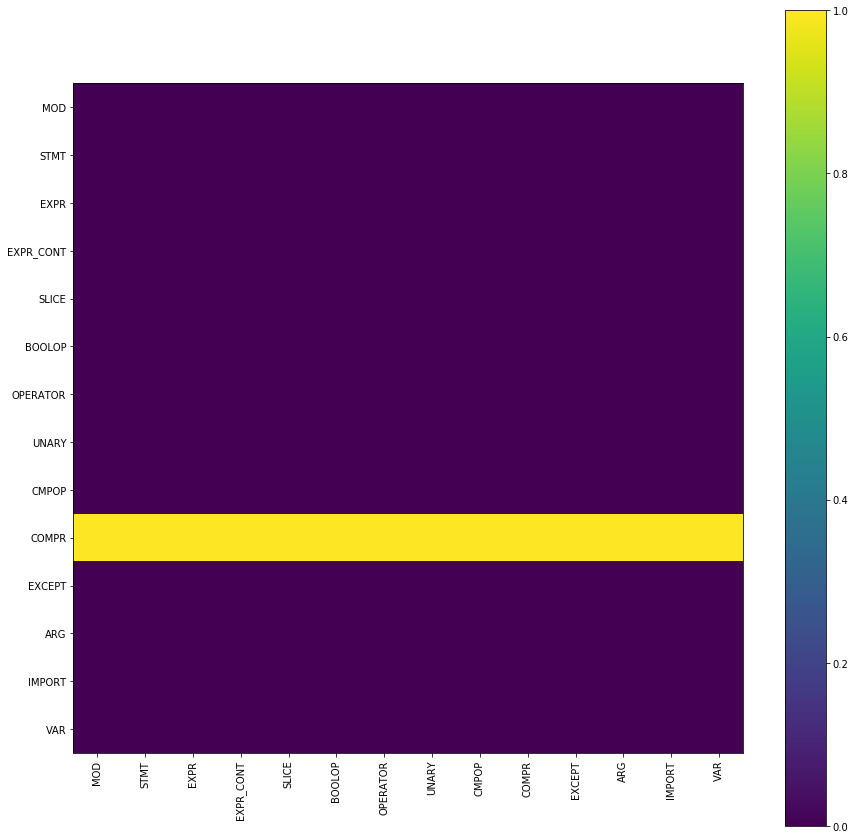

In [98]:
plt.figure(figsize=(15,15))
n = np.sum(confusion_mat, axis=0)
plt.imshow(confusion_mat / n)
plt.xticks(range(14), classes, rotation=90)
plt.yticks(range(14), classes)
plt.colorbar()

MOD 0.0 4 0.0
STMT 0.0 17597 0.055
EXPR 0.0 19440 0.06
EXPR_CONT 0.0 206 0.001
SLICE 0.0 8033 0.025
BOOLOP 0.0 157 0.0
OPERATOR 0.0 685 0.002
UNARY 0.0 192 0.001
CMPOP 0.0 6976 0.022
COMPR 1.0 88381 0.275
EXCEPT 0.0 6921 0.022
ARG 0.0 6 0.0
IMPORT 0.0 29 0.0
VAR 0.0 173023 0.538


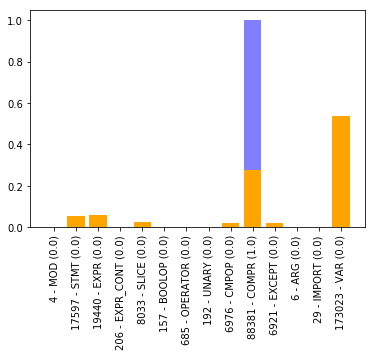

In [99]:
n = np.sum(confusion_mat, axis=0)
normed = confusion_mat / n
for i in range(14):
    plt.bar(classes[i], np.around(normed[i][i],3), color='b', alpha=0.5)
    plt.bar(classes[i], np.around(freqs[str(i)],3), color='orange')
    print(classes[i], np.around(normed[i][i],3), class_freqs[str(i)], np.around(freqs[str(i)],3))
plt.xticks(range(14), [str(class_freqs[str(i)])+" - "+c + " (" + str(np.around(normed[i][i],3)) + ")" for i,c in enumerate(classes)], rotation=90);

In [100]:
[freqs[str(i)]*normed[i][i] for i in range(14)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2747738224778486,
 0.0,
 0.0,
 0.0,
 0.0]

In [101]:
from sklearn.metrics import f1_score

In [102]:
preds = []; labels = []
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    preds.append(prediction)
    labels.append(label)

In [103]:
f1_score(labels, preds, average='micro')

0.26686460438364684

In [104]:
f1_score(labels, preds, average='macro')

0.0005925447676435586

In [105]:
f1_score(labels, preds, average='weighted')

0.1124298789727235